# EDA

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data

In [2]:
data = pd.read_csv('../f1dataset.csv')
data = data.drop(['raceIdOrdered', 'yearStarted', 'nationality'], axis=1)

## Analysis

### correlation

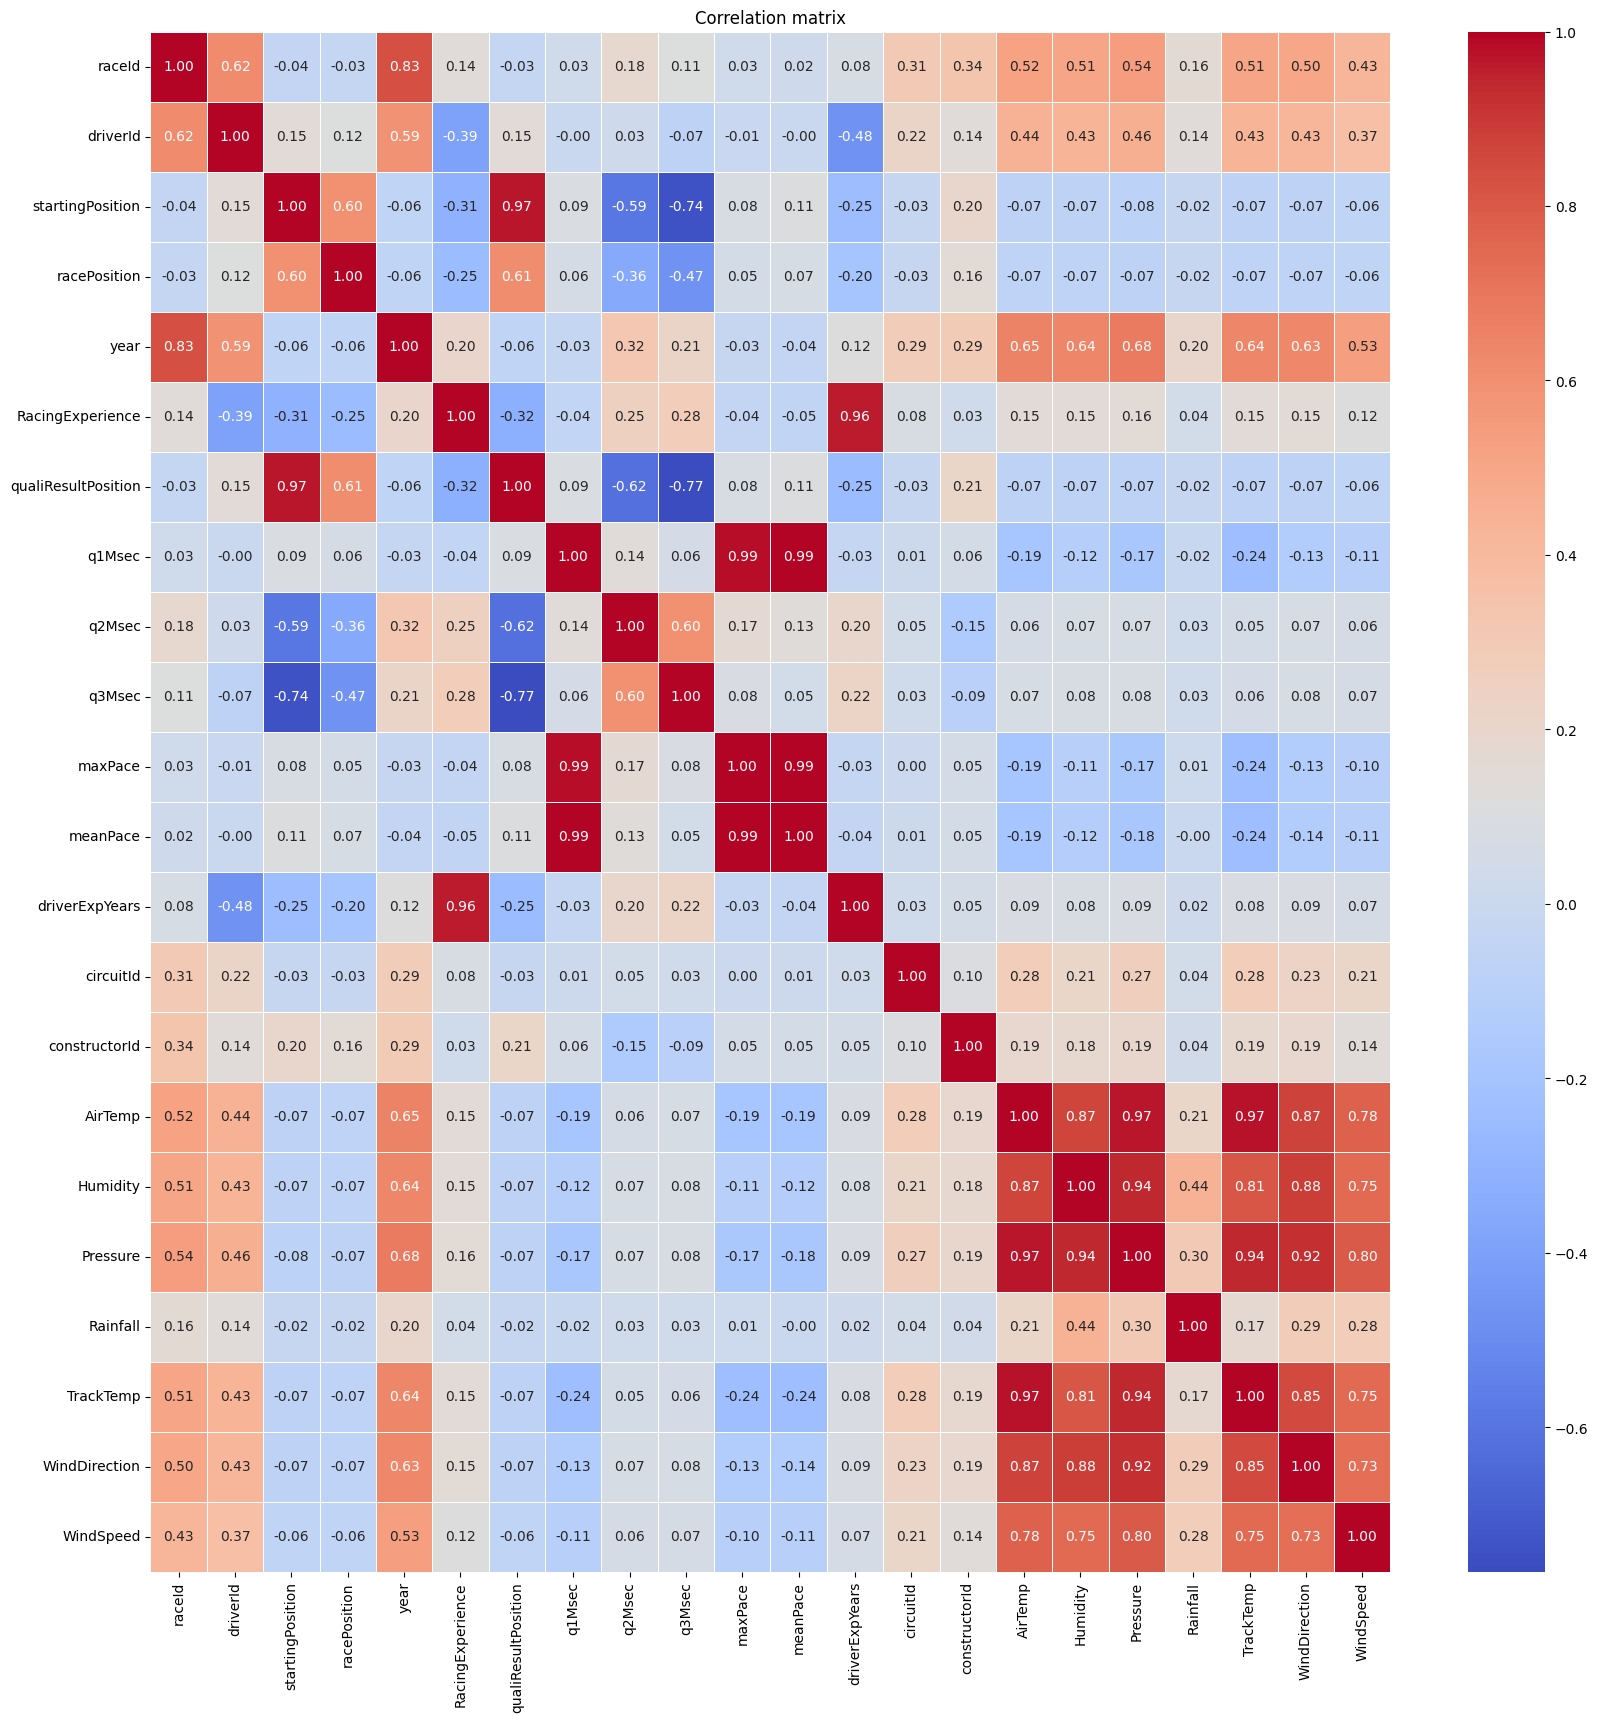

In [3]:
correlation_matrix = data.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation matrix')
plt.show()

### number of races per season

In [4]:
years = [1996, 1997, 1998, 1999, 2000, 2001, 2002, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]

result = {}

for year in years:
    df = data[data['year'] == year]
    result[year] = len(set(df['raceId']))


In [5]:
results_ = pd.DataFrame(result, index = ['Количество гонок']).T

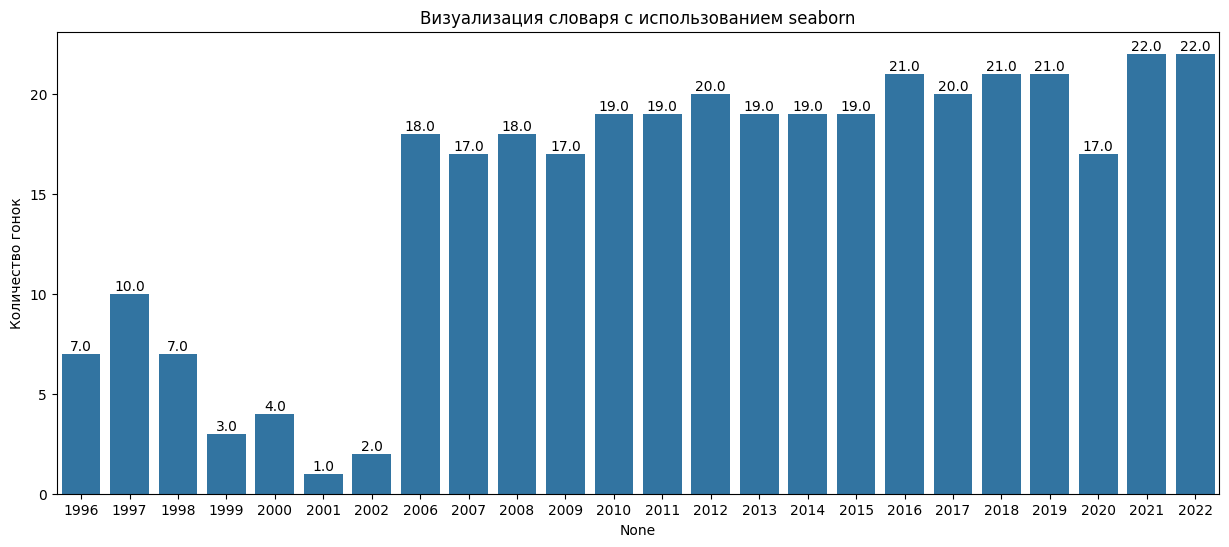

In [6]:

plt.figure(figsize=(15, 6))
ax = sns.barplot(x= results_.index, y='Количество гонок', data=results_)

for p in ax.patches:
    ax.annotate(f'{round(p.get_height(), 0)}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

plt.title('Визуализация словаря с использованием seaborn')
plt.show()

### The influence of pole position on winning the race

In [7]:
df = data[data['qualiResultPosition'] == 1]
df = df[['qualiResultPosition', 'racePosition']]
t = df['racePosition'].value_counts()

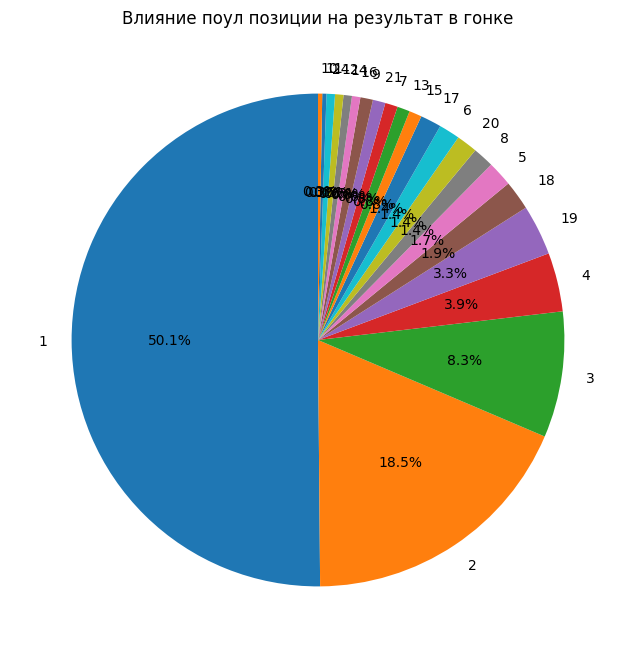

In [8]:
plt.figure(figsize=(20, 8))
plt.pie(t, labels=t.index, autopct='%1.1f%%', startangle=90)

plt.title('Влияние поул позиции на результат в гонке')
plt.show()

### On which track is the pole position most important

In [9]:
df = data[data['qualiResultPosition'] == 1]
circuitIds = list(set(df['circuitId']))

In [10]:
results_pole = {}
for circuitId in circuitIds:
    try:
        results_pole[circuitId] = df[df['circuitId'] == circuitId]['racePosition'].value_counts()[1]/len(df[df['circuitId'] == circuitId]['racePosition'])
    except:
        results_pole[circuitId] = 0

In [11]:
data_cir = pd.read_csv('../DataCollection/archive/circuits.csv')
res = {}
t = []
for cirid, value in results_pole.items():
    name_cir = list(data_cir[data_cir['circuitId'] == cirid]['name'])[0]
    res[name_cir] = value
    t.append(list(data_cir[data_cir['circuitId'] == cirid]['location'])[0])

In [12]:
res = pd.DataFrame(res, index= ['Frequency']).T
res = res.sort_values(by='Frequency', ascending=False)

In [13]:
res['Curl'] = res.index
res['location'] = t

In [15]:
res.to_csv('importancepoleposition.csv', index=False)

Text(0.5, 1.0, 'Важность поул позиции')

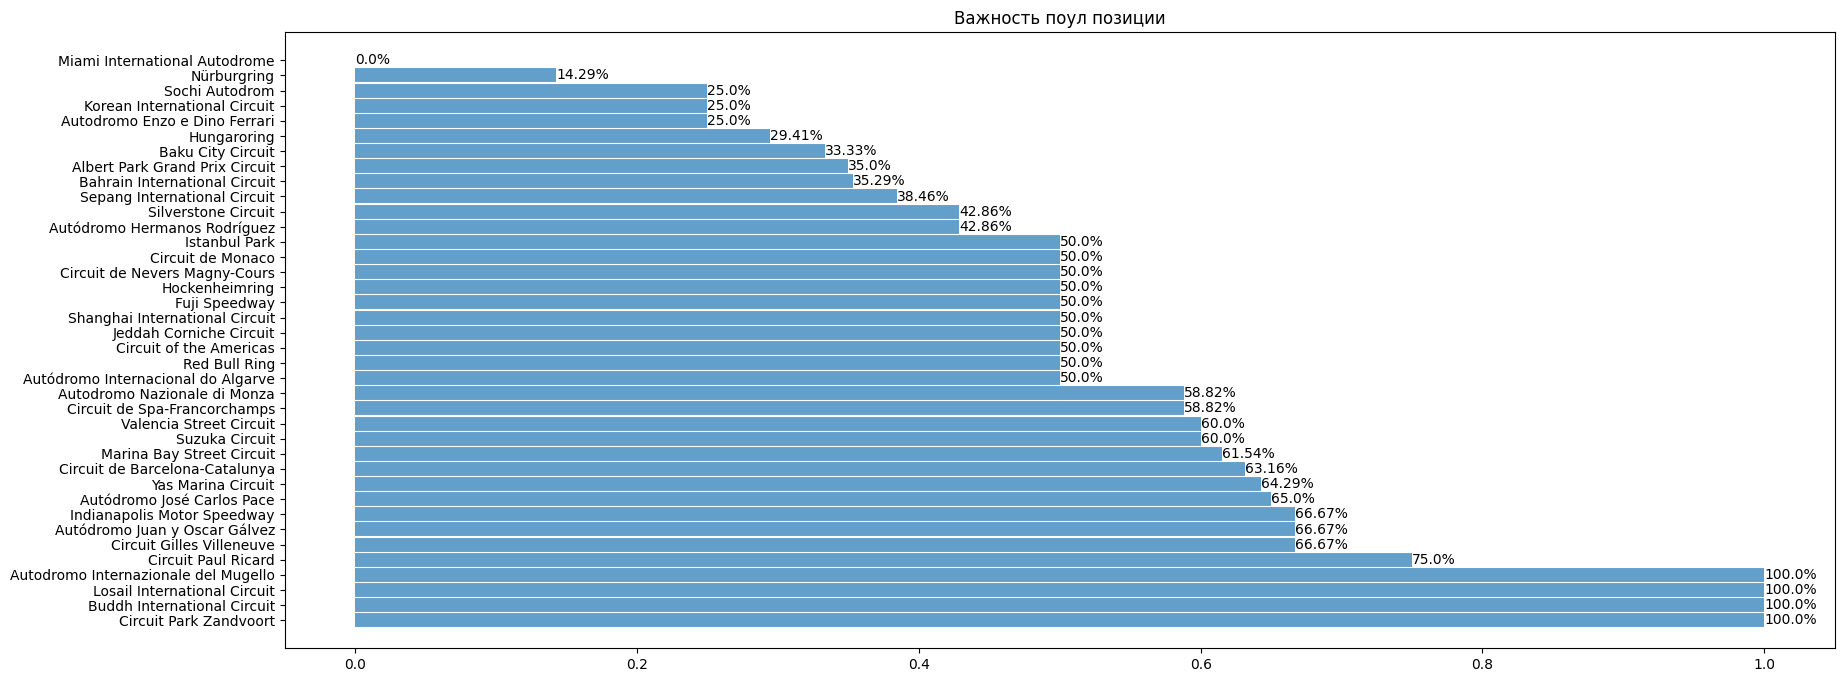

In [16]:
plt.figure(figsize=(20, 8))
for index, row in res.iterrows():
        plt.hlines(y=index, xmin=0, xmax=row['Frequency'], alpha=0.7, linewidth=10)
        plt.text(row['Frequency'], index, f'{str(round((row["Frequency"] * 100), 2)) + "%"}', va='center', fontsize=10, color='black')

plt.yticks(range(len(res)), res.index)
plt.title('Важность поул позиции')